In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import ParameterGrid


In [2]:
# Importing the dataset
data = pd.read_csv('fetal_health.csv')

## Data Exploration

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Text(0.5, 0.98, 'Histogram of Features')

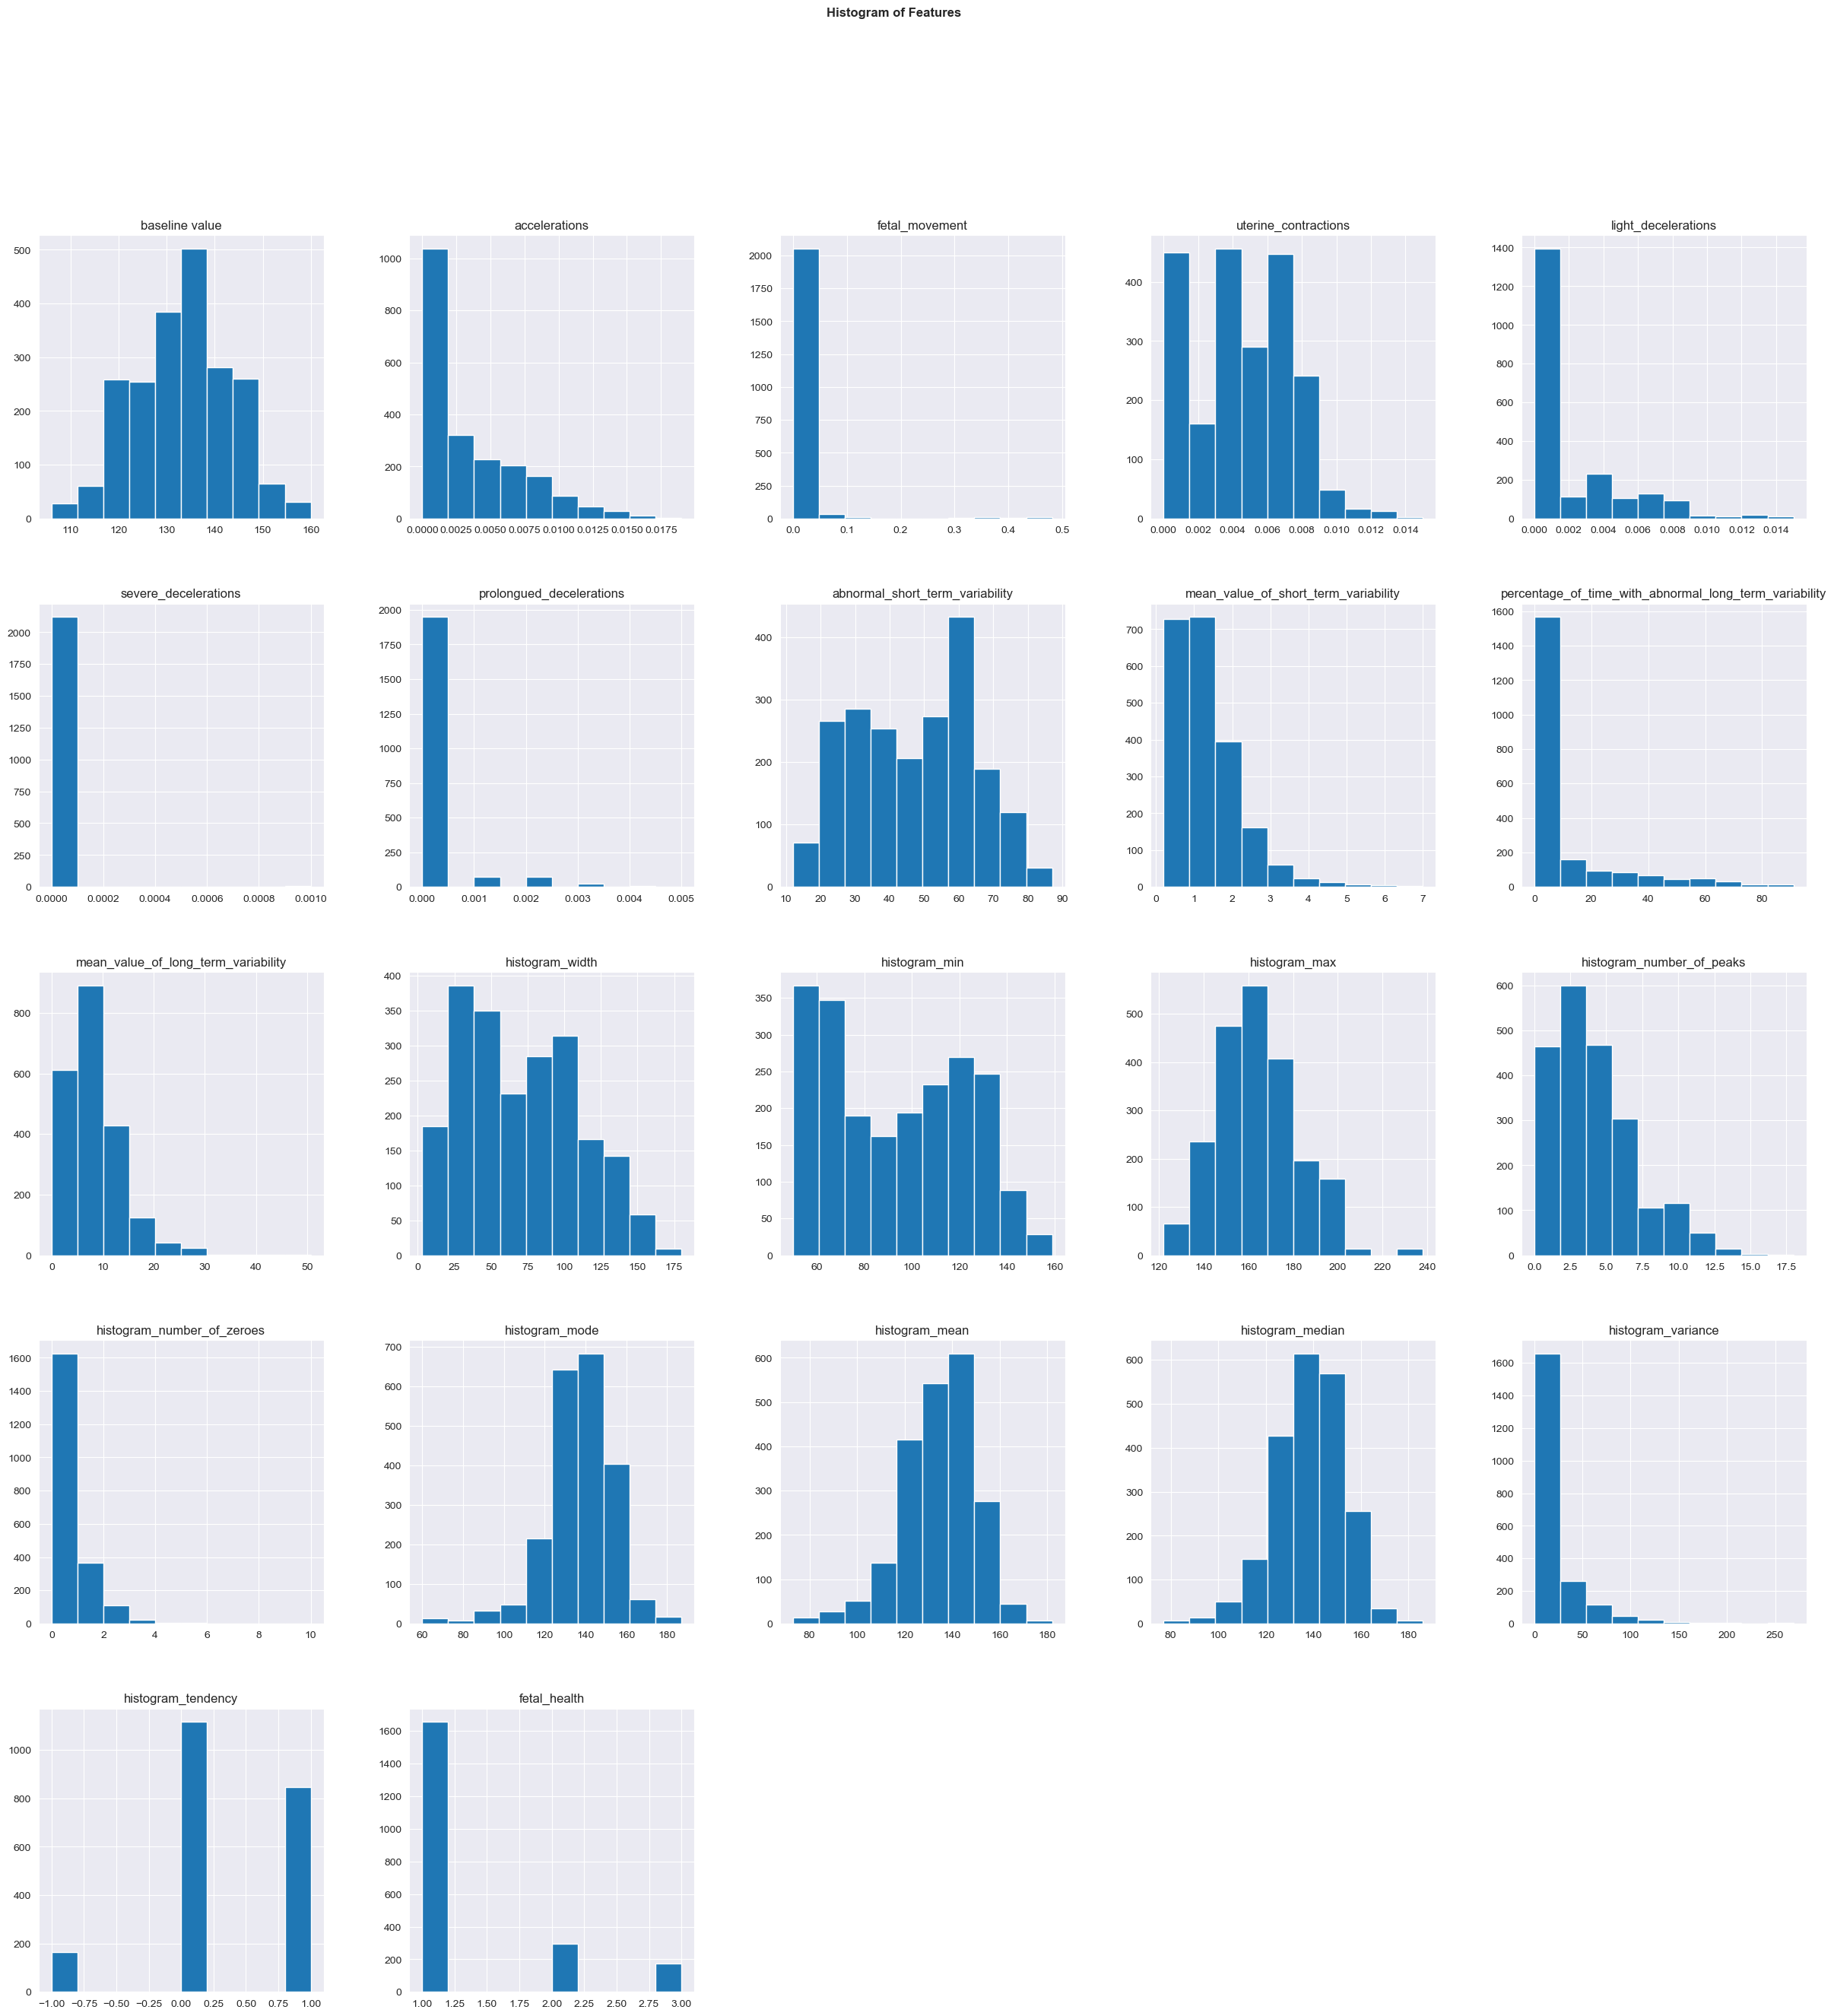

In [6]:
# Plot histogram for the features
data.hist(bins=10, figsize=(30, 30), grid=True)
plt.suptitle('Histogram of Features',fontweight='bold')

## Data Preprocessing

In [7]:
# data preprocessing
# check duplicates, missing value
print(f"Duplicated Data:{data.duplicated().sum()}, Null Data:{data.isnull().sum().sum()}")
# drop duplicates
data.drop_duplicates(inplace=True)

Duplicated Data:13, Null Data:0


Text(0.5, 1.0, 'Correlation Matrix')

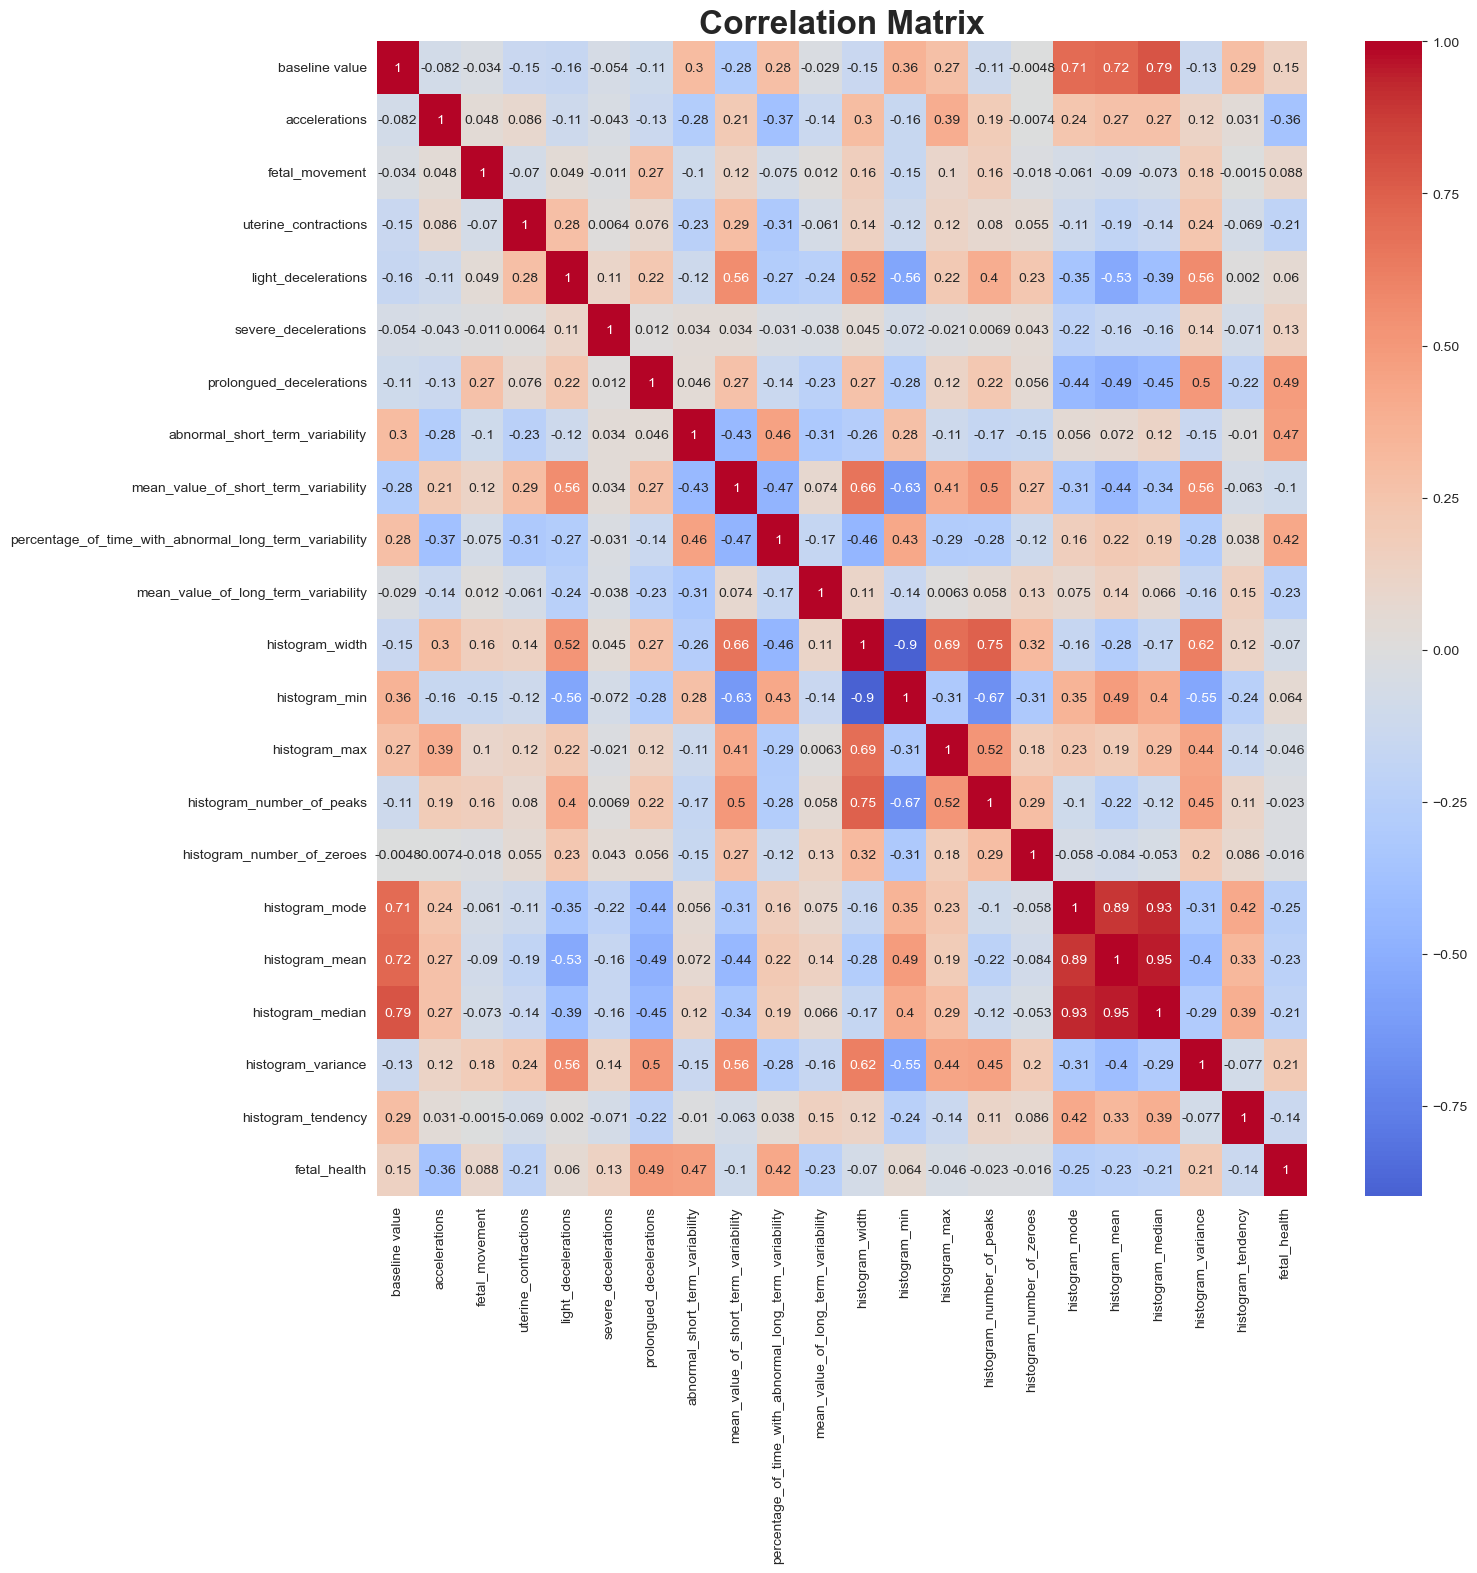

In [8]:
correlation_matrix=data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix',
          fontsize=24,
          fontweight='bold')

Text(0.5, 1.0, 'Correlation of Numerical Features with fetal_health')

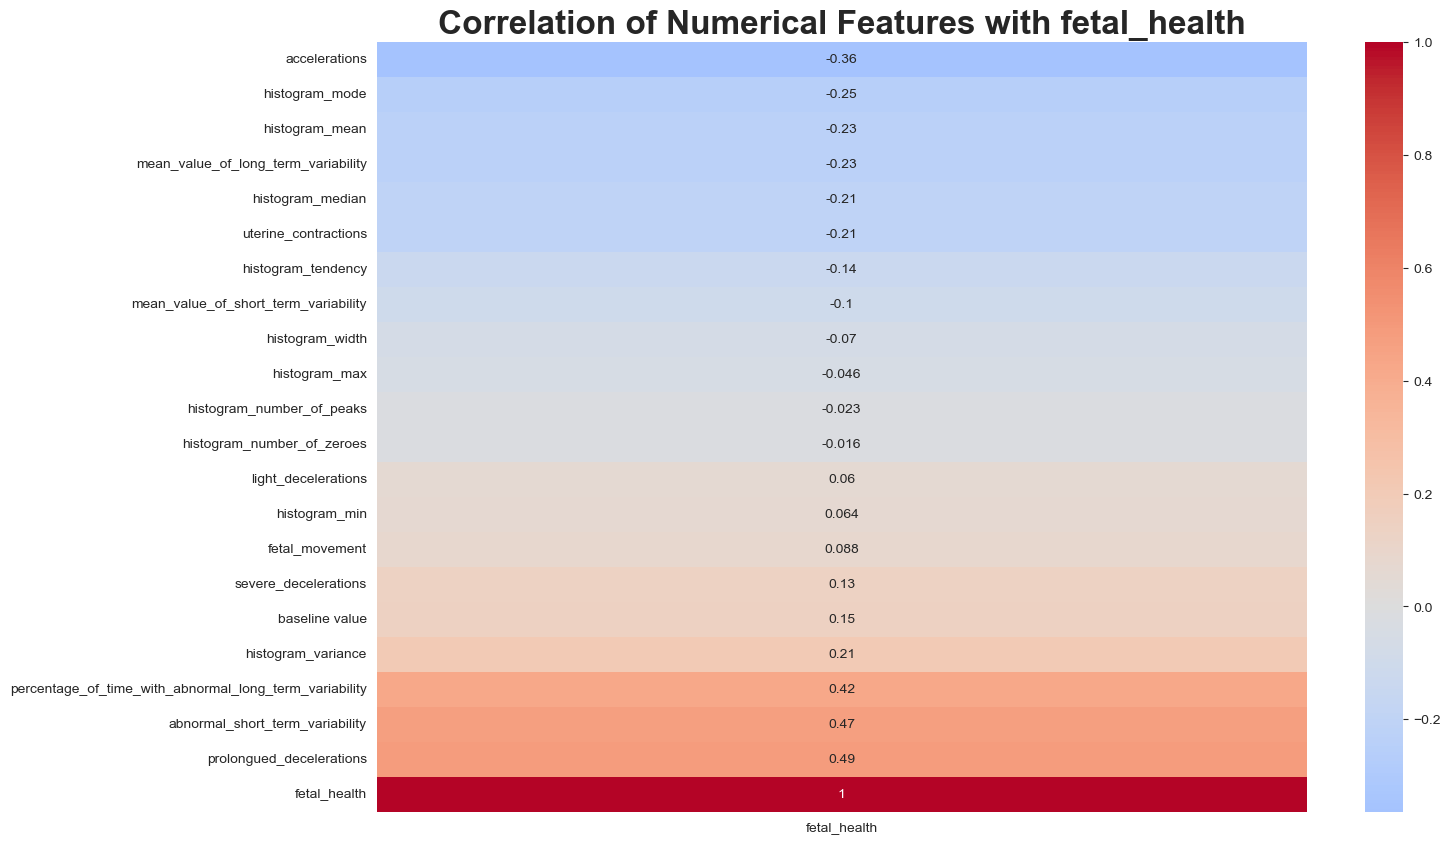

In [9]:
correlation_matrix = data.corr()['fetal_health']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with fetal_health",
                    fontsize=24,
                    fontweight="bold")

In [10]:
# data split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['fetal_health']), data['fetal_health'], test_size=0.2, random_state=42)
y_train = y_train-1
y_test = y_test-1

features_data=data.drop(columns=['fetal_health'])
target_data=data['fetal_health']

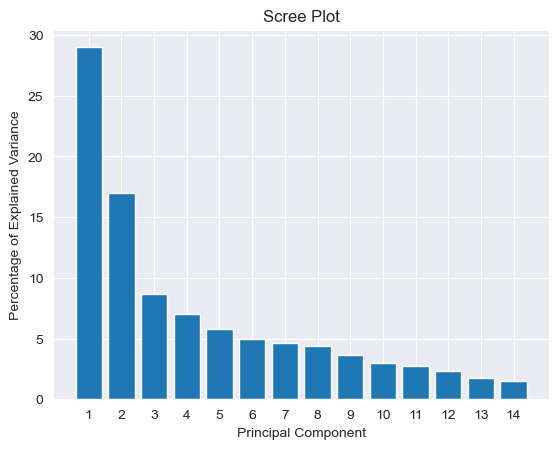

In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
# data standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca=PCA(n_components=0.95)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=100)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

## Data Analysis

In [22]:
# plot the confusion matrix

def plot_result(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    recall_score=calculate_Recall(y_test, y_pred)
    print(f"Recall: {recall_score}")
    print(f"report: {classification_report(y_test, y_pred)}")
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', center=0, xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# following functions for plotting ROC curve and ROC AUC are come from the GitHub repository:
# https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
def auc_score(model, y_test, y_proba):
    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    bins = [i/20 for i in range(20)] + [1]
    classes = model.classes_
    roc_auc_ovr = {}
    labels = ['Normal', 'Suspect', 'Pathological']
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]
        
        # Prepares an auxiliar dataframe to help with the plots
        df_aux = X_test.copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)
        
        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 3, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(labels[i])
        ax.legend([f"Class: {labels[i]}", "Rest"])
        ax.set_xlabel(f"P(x = {labels[i]})")
        
        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+4)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")
        
        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    plt.tight_layout()
# end quote

# consider both suspect and pathological as positive
def calculate_Recall(y_test, y_pred):
    false_negative = sum(1 for y_test, y_pred in zip(y_test, y_pred) if ((y_pred==0 and y_test!=0) or (y_pred==1 and y_test==2))) # strictly distinguish between pathological and suspect
    # false_negative = sum(1 for y_test, y_pred in zip(y_test, y_pred) if (y_pred==0 and y_test!=0)) # dont distinguish whether pathological or suspect(both are consider as positive as a whole)
    true_positive = sum(1 for y_test, y_pred in zip(y_test, y_pred) if ((y_pred!=0) and (y_test == y_pred)))
    recall= true_positive/(true_positive+false_negative)
    return recall

### Linear Classifiers

#### Perceptron

Average Cross Validation Score: 0.8281637592013714
Accuracy: 0.9125295508274232
Recall: 0.7530864197530864
report:               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       341
         1.0       0.72      0.70      0.71        54
         2.0       0.85      0.82      0.84        28

    accuracy                           0.91       423
   macro avg       0.84      0.83      0.83       423
weighted avg       0.91      0.91      0.91       423


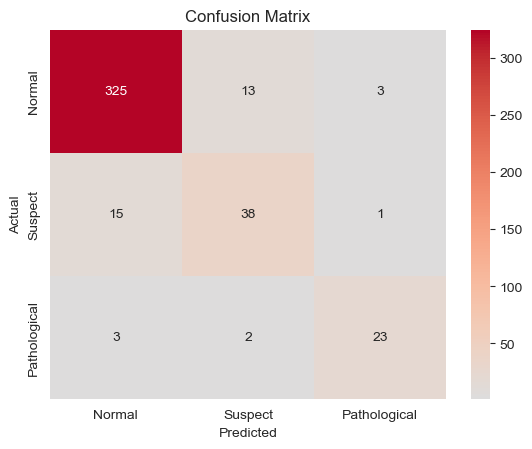

In [17]:
# using cross validation to evaluate the model
pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',Perceptron())])
mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")

# train and test the model
clf=Perceptron()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
plot_result(y_test, y_pred)

#### Logistic Regression

Average Cross Validation Score: 0.8537248047684672
Accuracy: 0.9267139479905437
Recall: 0.7317073170731707
report:               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       341
         1.0       0.80      0.67      0.73        54
         2.0       1.00      0.86      0.92        28

    accuracy                           0.93       423
   macro avg       0.91      0.83      0.87       423
weighted avg       0.92      0.93      0.92       423


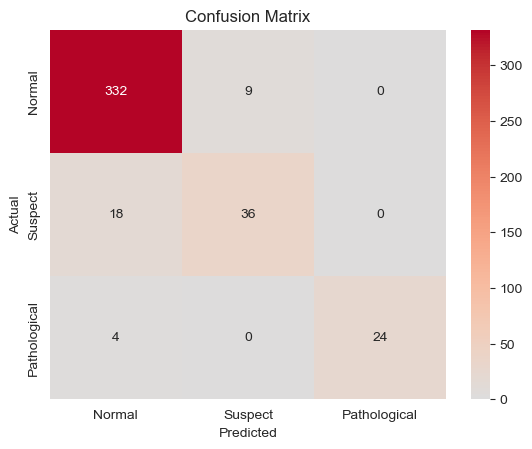

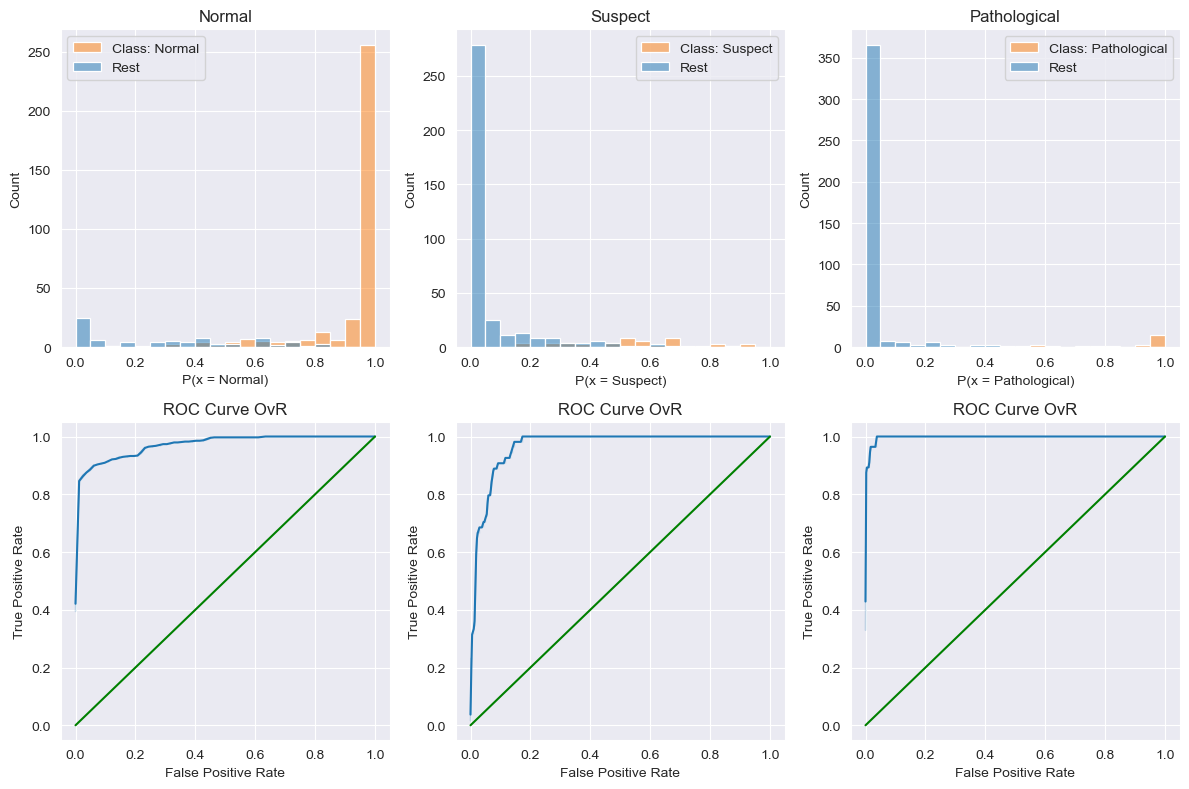

In [23]:
from sklearn.linear_model import LogisticRegression

# using cross validation to evaluate the model
pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',LogisticRegression())])
mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")

# train and test the model
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred = lr_model.predict(X_test_pca)
plot_result(y_test, y_pred)

y_pred_proba = lr_model.predict_proba(X_test_pca)
auc_score(lr_model, y_test, y_pred_proba)

#### Linear Support Vector Machine(SVM)

C:\Users\Alton\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alton\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alton\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alton\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alton\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Cross Validation Score: 0.8404692279251117
Accuracy: 0.9243498817966903
Recall: 0.6707317073170732
report:               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       341
         1.0       0.84      0.57      0.68        54
         2.0       1.00      0.86      0.92        28

    accuracy                           0.92       423
   macro avg       0.92      0.81      0.85       423
weighted avg       0.92      0.92      0.92       423


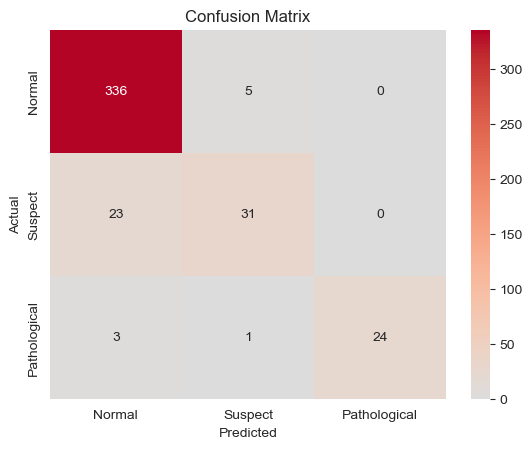

In [29]:
from sklearn.svm import LinearSVC
pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',LinearSVC())])
mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")

# train and test the model
svm_model = LinearSVC()
svm_model.fit(X_train_pca, y_train)
y_pred = svm_model.predict(X_test_pca)
plot_result(y_test, y_pred)

### Non-Linear Classifiers

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n=range(1,30)
max=0
max_pred=[]
k1=0
max_mean_score=0
k2=0
max_recall=0
k3=0
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i) 
    pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',KNeighborsClassifier(n_neighbors=i))]) # Using Euclidean distance 
    mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    score=accuracy_score(y_test, y_pred)
    recall=calculate_Recall(y_test, y_pred)
    if score>max:
        max=score
        max_pred=y_pred
        k1=i
    if mean_score>max_mean_score:
        max_mean_score=mean_score
        k2=i
    if recall>max_recall:
        max_recall=recall
        k3=i
    # print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Max Accuracy: {max}, K: {k1}\nMax Average Cross Validation Scorean: {max_mean_score}, K:{k2}\nMax Recall: {max_recall}, K:{k3}")
plot_result(y_test, max_pred)

#### Random Forest

Average Cross Validation Score: 0.8509024906725825
Accuracy: 0.9219858156028369
Recall: 0.6666666666666666
report:               precision    recall  f1-score   support

         0.0       0.93      0.99      0.95       341
         1.0       0.86      0.56      0.67        54
         2.0       0.96      0.86      0.91        28

    accuracy                           0.92       423
   macro avg       0.91      0.80      0.84       423
weighted avg       0.92      0.92      0.92       423


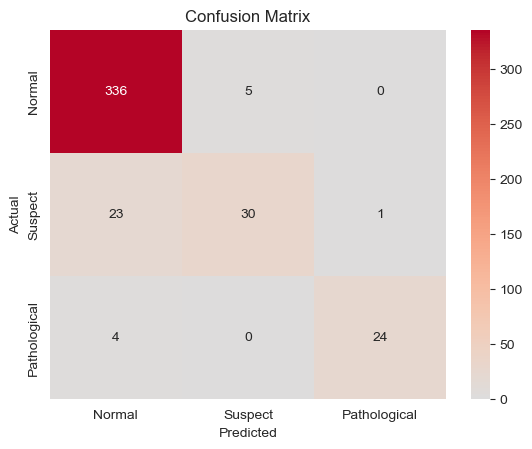

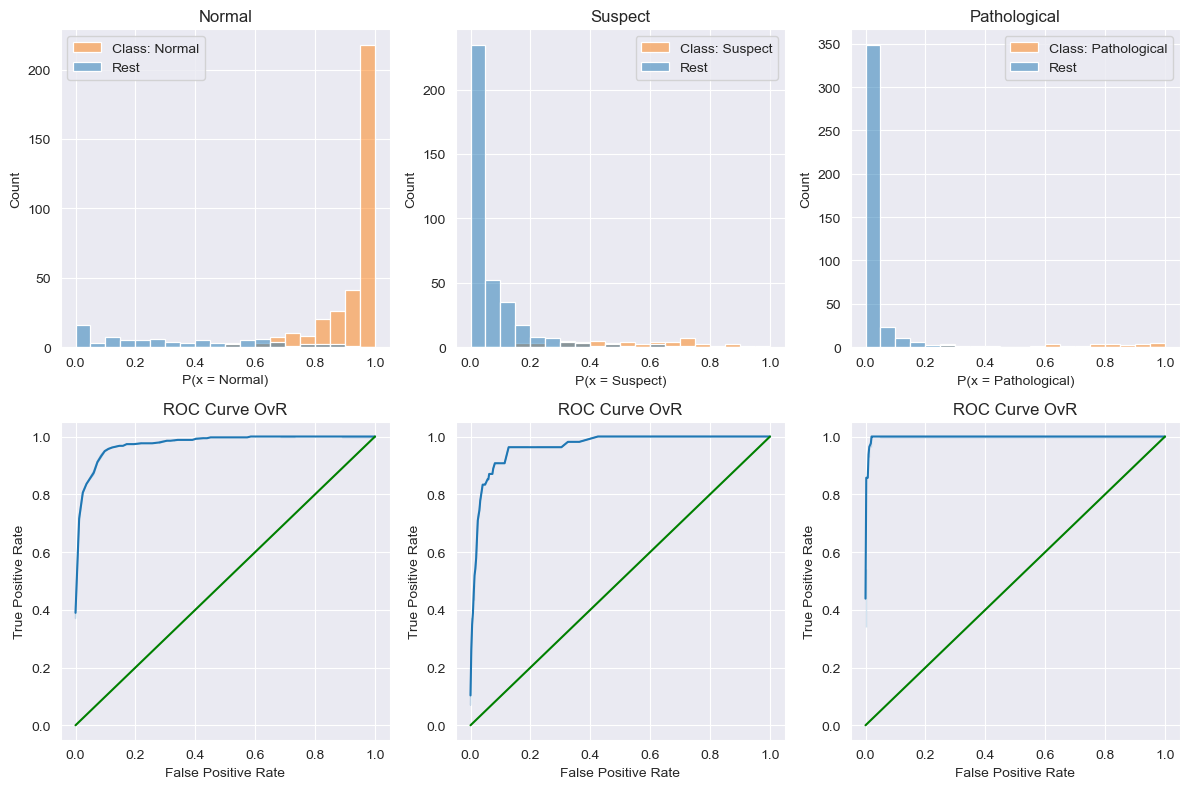

In [30]:
from sklearn.ensemble import RandomForestClassifier
# using cross validation to evaluate the model
pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',RandomForestClassifier())])
mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")

# train and test the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)
y_pred = rf_model.predict(X_test_pca)
plot_result(y_test, y_pred)

y_pred_proba = rf_model.predict_proba(X_test_pca)
auc_score(rf_model, y_test, y_pred_proba)

#### SVM

Average Cross Validation Score: 0.846638208239499
Accuracy: 0.9361702127659575
Recall: 0.7195121951219512
report:               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       341
         1.0       0.89      0.61      0.73        54
         2.0       1.00      0.93      0.96        28

    accuracy                           0.94       423
   macro avg       0.94      0.84      0.88       423
weighted avg       0.93      0.94      0.93       423


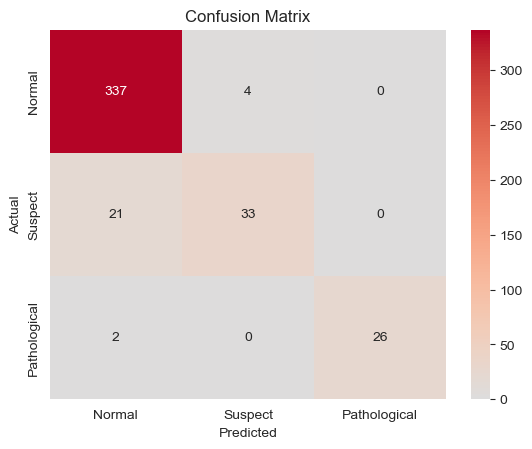

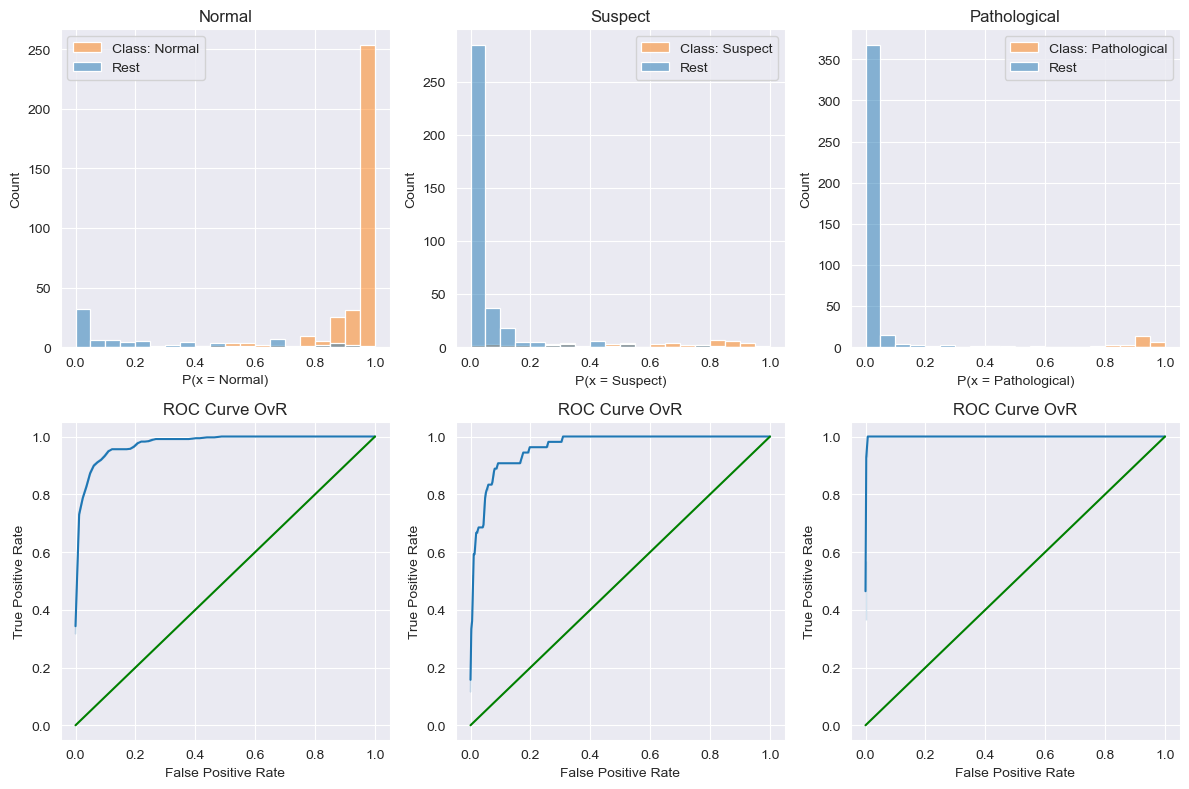

In [32]:
from sklearn.svm import SVC
# using cross validation to evaluate the model
pipeline=Pipeline(steps=[('scaler',StandardScaler()),('pca',PCA(n_components=0.95)),('model',SVC())])
mean_score=cross_val_score(estimator=pipeline,X=features_data,y=target_data, cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")

# train and test the model
nl_svm_model = SVC(probability=True)
nl_svm_model.fit(X_train_pca, y_train)
y_pred = nl_svm_model.predict(X_test_pca)
plot_result(y_test, y_pred)

y_pred_proba = nl_svm_model.predict_proba(X_test_pca)
auc_score(nl_svm_model, y_test, y_pred_proba)

#### Multi-Layer Perceptron (MLP)

In [ ]:
device = torch.device("cpu")
if torch.cuda.is_available():
    print("Cuda is available")
    device = torch.device("cuda")

# Hyperparameters For tuning
learning_rate = 0.001
num_epochs = 1000
num_features = 14
dropout_rate = 0.2
param_grid= {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0, 0.1, 0.3],
    'hidden_sizes': [[64], [64, 32], [64, 32, 16], [64, 32, 16, 8]],

}

train_losses = []

# Convert series to Pytorch tensors
y_train_numpy=y_train.to_numpy()
y_test_numpy=y_test.to_numpy()
inputs_train = torch.tensor(X_train_pca,dtype=torch.float32)
targets_train = torch.from_numpy(y_train_numpy)
targets_train = targets_train.type(torch.long)
inputs_test = torch.tensor(X_test_pca,dtype=torch.float32)
targets_test = torch.from_numpy(y_test_numpy)
targets_test = targets_test.type(torch.long)


y_test_nn= targets_test.numpy()
best_train_loss=[]
max_acccuracy=0
max_pred=[]
best_params={}

# GPU
inputs_train = inputs_train.to(device)
targets_train = targets_train.to(device)
inputs_test = inputs_test.to(device)
targets_test = targets_test.to(device)

# Grid search
for params in ParameterGrid(param_grid):   
    # define MLP model
    class MLP(nn.Module):
        def __init__(self,num_features):
            super(MLP, self).__init__()
            layers= []
            last_size = num_features
            for hidden_size in params['hidden_sizes']:
                layers.append(nn.Linear(last_size, hidden_size))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(params['dropout_rate']))
                last_size = hidden_size
            
            output_layers= []
            output_layers.append(nn.Linear(last_size, 3))
            output_layers.append(nn.Softmax(dim=1))

            self.fc_out = nn.Sequential(*output_layers)
            self.layers = nn.Sequential(*layers)

        def forward(self, input):
            out = self.layers(input)
            out = self.fc_out(out)
            return out
    
    # number of input features as the number of neurons in the input layer
    model = MLP(num_features).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # Train the model
    for epoch in range(num_epochs):
        optimizer.zero_grad()  # Clearing the gradients at each epoch start
        outputs_train=model(inputs_train)
        # print(outputs_train)
        # print(targets_train)
        loss = criterion(outputs_train, targets_train)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs_train, 1)

        # plot
        # store the loss value for plotting
        train_losses.append(loss.item())
        # calculate the accuracy
        total_correct = 0
        total_correct += (predicted == targets_train).sum().item()
        # print(f"Epoch {epoch+1}, Loss: {loss.item()}, Accuracy: {total_correct/len(targets_train)}")

    # Test the model
    with torch.no_grad():
        model.eval()
        outputs_pred = model(inputs_test)
        _, predicted = torch.max(outputs_pred, 1)
    
    # keep best result by comparing the accuracy
    predicted = predicted.cpu().numpy()
    test_accuracy=accuracy_score(y_test_nn, predicted)
    if test_accuracy>max_acccuracy:
        max_acccuracy=test_accuracy
        max_pred=predicted
        best_params=params
        best_train_loss=train_losses
    train_losses=[]

# plot the result
print(f"Best Parameters: {best_params}")
plot_result(y_test_nn, max_pred)
plt.plot(best_train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


#### Ensemble Model

Accuracy: 0.933806146572104
Recall: 0.7439024390243902
report:               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       341
         1.0       0.84      0.67      0.74        54
         2.0       1.00      0.89      0.94        28

    accuracy                           0.93       423
   macro avg       0.93      0.85      0.88       423
weighted avg       0.93      0.93      0.93       423


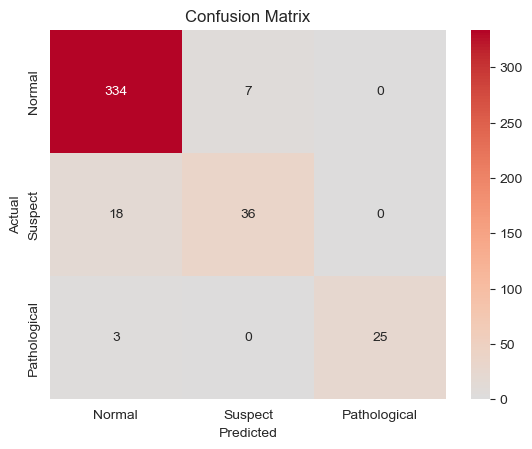

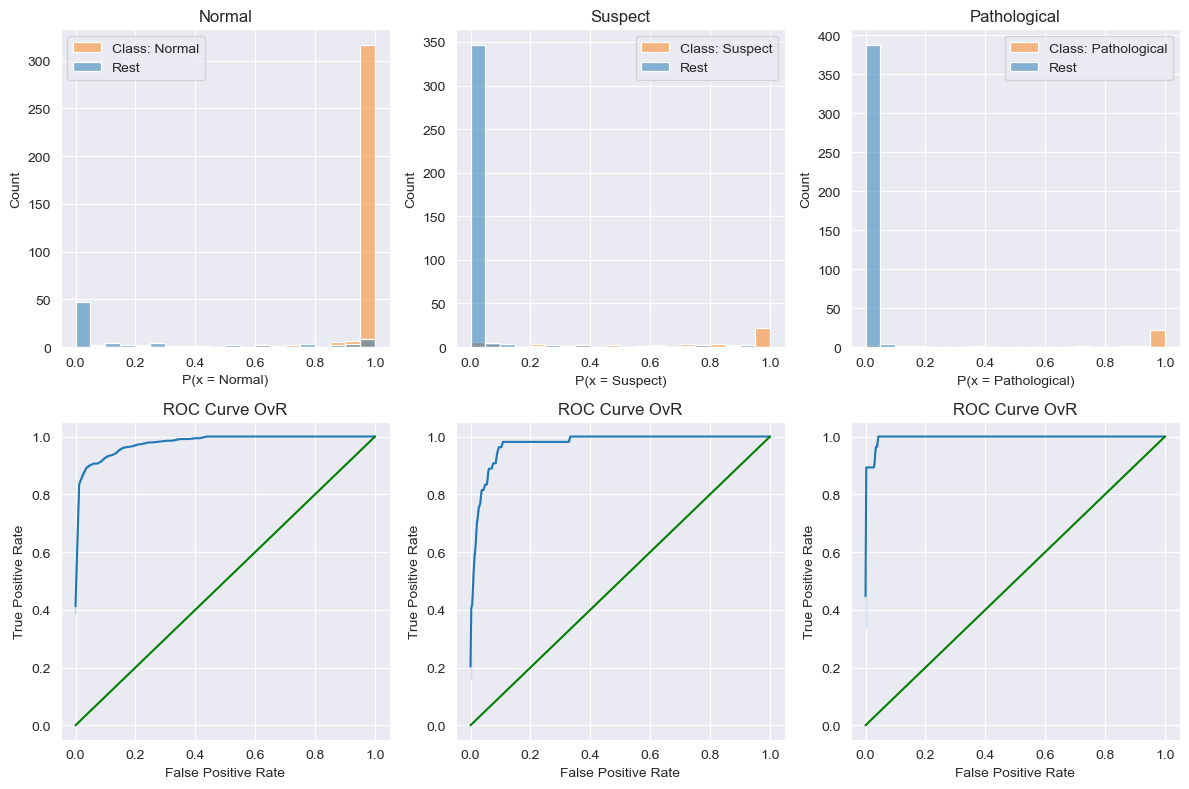

In [33]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train_pca, y_train)
y_pred = xgb_model.predict(X_test_pca)
plot_result(y_test, y_pred)

y_pred_proba = xgb_model.predict_proba(X_test_pca)
auc_score(xgb_model, y_test, y_pred_proba)

In [ ]:
## TODO: Combine XGBoost with another model